# Chapter 11. The Lambert Problem
## Action by Juanita A. Agudelo-Quiceno, University of Antioquia

In this notebook we will present theory from the Lambert Problem related to mechanical orbits and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

> Prussing, J. E., & Conway, B. A. (1993). Orbital Mechanics. Oxford university press.

 ## Section 11.1: Introduction

The Lamber's problem tries to find an orbit from two positions and time of flight that separates them, this is a fundamental problem in astrodynamics. If we wanted a spacecraft to travel from one point in the space to another target point, for example, a planet or a space station, We would have to calculate the orbit in which the spacecraft has to move to reach its goal and the time it takes to get from one point to another. The spacecraft could intercept the target, that is, find a point where both bodies meet, without the need for the speeds of the bodies to be equal. Or we can make the spacecraft and the target meet at the same point at the same speed. The second one it's call rendevouz. For ilustrate this, we make a space rendevouz between the ISS and the Soyuz spacecraft using **rebound**. The main idea is 


<table>
    <thead>
        <tr>
            <th colspan="2" style="font-size:30px"><center>The first space tourist</center></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td colspan="2">The Soyuz TMA-9 mission was a spaceflight launched on September 18, 2006, and lasted for about 10 days. The mission was a part of the International Space Station (ISS) program and was carried out by the Russian Federal Space Agency (Roscosmos).

The Soyuz TMA-9 spacecraft carried three crew members to the ISS: Russian cosmonaut Mikhail Tyurin, American astronaut Michael Lopez-Alegria, and the first space tourist, Iranian-American entrepreneur Anousheh Ansari. Ansari paid a reported $20 million for her trip to the ISS, which made her the fourth privately funded space tourist and the first female space tourist.

During her stay on the ISS, Ansari conducted various experiments and communicated with people on the Earth through a blog. She also became the first person to deliver a video message from space to the TED Conference, which was held in Monterey, California.

The Soyuz TMA-9 mission marked a significant milestone in the history of space travel, as it demonstrated that private individuals could travel to space by paying for their trips. This paved the way for the development of commercial spaceflight and space tourism, which has gained momentum in recent years.
<center><img src="Anousheh.jpg"
     alt="Anousheh Ansari, the first space tourist"
     width="400"
     height="300"></center>
     
</td>
        </tr>
    </tbody>
</table>



In [1]:
import rebound as rb
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
import numpy as np
from matplotlib import animation
import celluloid as cell
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as im


In [2]:
sim = rb.Simulation()
sim.units = ["km","kg","s"]
sim.add(m=5.9e24)
sim.add(m=0, a=6.7, e=6.13e-3)

In [3]:
r_soyuz = np.array(sim.particles[1].xyz) + 0.001
v_soyuz = sim.particles[1].vxyz

delta_v = 20
v_soyuz[0], v_soyuz[1] = v_soyuz[0] + delta_v, v_soyuz[1] + delta_v

sim.add(m=0, x=r_soyuz[0], y=r_soyuz[1], z=r_soyuz[2], vx=v_soyuz[0], vy=v_soyuz[1], vz=v_soyuz[2])

In [4]:
Nt = 200
steps = np.linspace(0, 5, Nt)
r_iss = np.zeros((Nt+1, 3))
r_soyuz = np.zeros((Nt+1, 3))
r_earth = np.zeros((Nt+1, 3))

r_iss[0] = sim.particles[1].xyz
r_soyuz[0] = sim.particles[2].xyz
r_earth[0] = sim.particles[0].xyz

for i, step in enumerate(steps):
    sim.integrate(-step)
    r_earth[i+1] = sim.particles[0].xyz
    r_iss[i+1] = sim.particles[1].xyz
    r_soyuz[i+1] = sim.particles[2].xyz

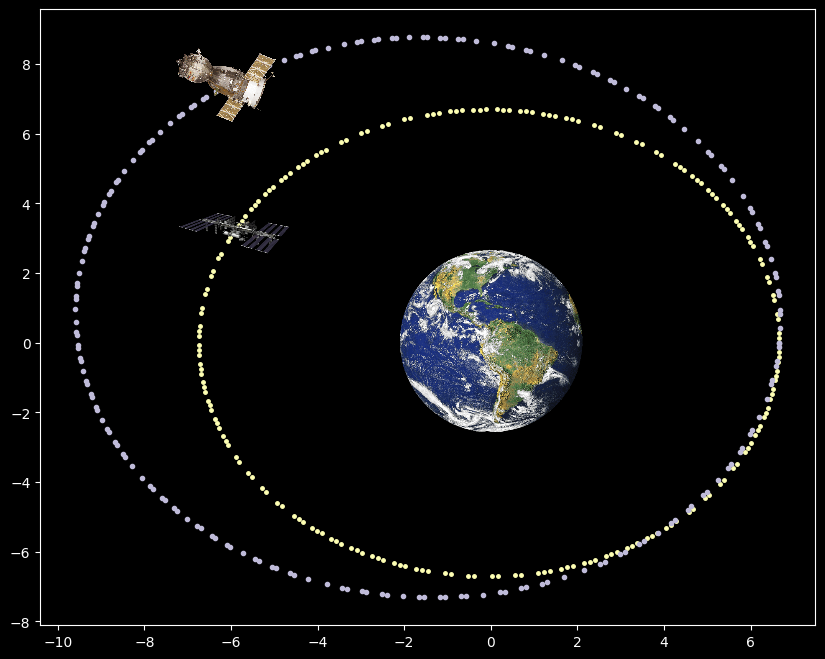

In [5]:
plt.style.use('dark_background')

fig,ax=plt.subplots(figsize=(10,8))

earth = im.imread('earth.png')
Iss = im.imread('ISS.png')
Spyuz = im.imread('Soyuz.png')

imagebox1 = OffsetImage(earth, zoom = 0.3)
imagebox2 = OffsetImage(Iss, zoom = 0.2)
imagebox3 = OffsetImage(Spyuz, zoom = 0.03)

ab1 = AnnotationBbox(imagebox1, (r_earth[:,0][0], r_earth[:,1][0]), frameon = False)
ab2 = AnnotationBbox(imagebox2, (r_iss[:,0][5],r_iss[:,1][5]), frameon = False)
ab3 = AnnotationBbox(imagebox3, (r_soyuz[:,0][7], r_soyuz[:,1][7]), frameon = False)

ax.plot(r_earth[:,0], r_earth[:,1], '.', markersize=10)
ax.plot(r_iss[:,0], r_iss[:,1], '.', markersize=5)
ax.plot(r_soyuz[:,0], r_soyuz[:,1], '.')
ax.add_artist(ab1)
ax.add_artist(ab2)
ax.add_artist(ab3)


In [6]:
#animacion
plt.ioff()
plt.style.use('dark_background')

fig,ax=plt.subplots(figsize=(10,8))

camera = cell.Camera(fig)

earth = im.imread('earth.png')
Iss = im.imread('ISS.png')
Spyuz = im.imread('Soyuz.png')

imagebox1 = OffsetImage(earth, zoom = 0.3)
imagebox2 = OffsetImage(Iss, zoom = 0.2)
imagebox3 = OffsetImage(Spyuz, zoom = 0.03)

for i in range(len(r_earth[1:10,0])):
  ab1 = AnnotationBbox(imagebox1, (r_earth[1:10,0][-i], r_earth[1:10,0][-i]), frameon = False)
  ab2 = AnnotationBbox(imagebox2, (r_iss[1:10,0][-i],r_iss[1:10,1][-i]), frameon = False)
  ab3 = AnnotationBbox(imagebox3, (r_soyuz[1:10,0][-i], r_soyuz[1:10,1][-i]), frameon = False)

  ax.plot(r_earth[1:10,0][-i],r_earth[1:10,1][-i], '.', markersize=10)
  ax.plot(r_iss[1:10,0][-i],r_iss[1:10,1][-i], '.', markersize=5)
  ax.plot(r_soyuz[1:10,0][-i],r_soyuz[1:10,1][-i], '.')

  ax.add_artist(ab1)
  ax.add_artist(ab2)
  ax.add_artist(ab3)

  camera.snap()
    
plt.close()
plt.ion();

In [8]:
anim = camera.animate(interval=250)

/home/juanita/.local/lib/python3.10/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [9]:
HTML(anim.to_html5_video())

buscar: MC-CuadernoClase-UnidadesCanonicas.ipynb
MC-CuadernoClase-SolucionEcuacionKepler.ipynb
MC-CuadernoClase-AnomaliasConicas.ipynb
MC-CuadernoClase-NcuerposAnimado.ipynb
https://es.wikipedia.org/wiki/Soyuz_TMA-14
https://es.wikipedia.org/wiki/Anousheh_Ansari
https://rebound.readthedocs.io/en/latest/integrators/

 ## Section 11.2: Transer Orbits Between Specified Points 

 ## Section 11.3: Lambert's Theorem 

 ## Section 11.4: Properties of the solutions to Lambert's Equation

For 





links that help me: 
- https://www.spacecraftresearch.com/generalized-orbit-rendezvous
- https://en.wikipedia.org/wiki/Space_rendezvous
- https://www.youtube.com/watch?v=ULRXJsiFMjo
- https://mappingignorance.org/2021/03/24/homa-a-space-orbit-simulator/